##Theory Questions (28%)

Answer for question 1:

The evaluation metric that is more important to us for evaluate how well our model preform T1D is: performance statistics. 
For medical and life subjects, the performance of ML is a life changer. We want to get the higher TP TN and the lower FP FN. By those parameters we can examine our model outputs, and if they do not satisfy, we can train our models again with different hyperparameters values. 

Furthermore, we remember that accuracy have some limits: it does not consider all the patients so sometimes is not precise (according to the example in lecture #8 -AF patients). 

We can illustrate our claim by the fact that if we ask to train an ML Corona test (to predict who have the more probability to be infected by Corona). If the performance will be good:  the amount of FN FP will be low so we can say that the model is more reliable and by that we can decrease the infection coefficient and the virus will be less spreaded.  
 

Answer for question 2:

The pros of chosing the first classifier- only BP and BMI features:

Using only two features for training the model will be easier to apply, so the time for training will be shorter, and getting a pretty good model results. Moreover, it can decrease that the number of irrelevant features, so it will not mislead the model.  

The cons for only using BP and BMI features:

There is a chance that for only two features the ML model will not be accurate because it doesn't take all the variables effecting the decision. Following this, we can miss a lot of information that can cost a life of patients by creating an underfitted model. 

The pros of choose the second classifier: uses all the features that available:

If we have a multiply features it can cause more accurate model and find connections of features that you have not thought about before. We can also see the correlation in ML model 

The cons of choose the second classifier: uses all the features that available:

If we have a multiply features it can cause increased overfitting. Furthermore, the time of the training will increase and harm the simplicity of the model because of the need of big data of training sets.


Answer for question 3: logistic regression liner SVM or nonlinear SVM

Our recommendation of which model to use will be based on the number of features the histologic examined and the number of cells she took the data from. 
If the number of features is large (up to 10,000 features) and the number of cells tested is around hundred (pretty small) then we will recommend using logistic regression or SVM without kernel (i.e linear SVM).
On the other hand, if the number of patients (or cells in our case) is mediate and the number of features is smaller, we will recommend using nonlinear SVM (with Gaussian kernel). 
Moreover, we need to take in consideration whether the data is geometric or linearly separable. We think that there is not a one right answer for this question. 
According to the given data, it seems the histologic has many features so we will recommend her to use logistic regression. Linear SVM is excluded because the cells are similar to each other and it will be difficult to find maxima margin between the closest support vectors.
If she does not get a good classification using linear model, we will recommend her to try the nonlinear SVM, maybe the data is not linearly separable and in higher domain she could see a better distinguish classes. 


Answer for question 4:

The differences between LR and linear SVM:

First, each model has a different approach for training classification:

LR: Maximize the posterior class probability 

SVM: Maximize the margin between the closest support vectors and an optimal hyperplane is drawn in the midpoint.


Logistic regression is a good model if we have a good intuition that our data is linear separable. This model gives the probability of a sample to be classified in one of the classes (depends on the threshold chosen), what SVM-linear doesn't.

In addition, LR works with identified independent variables, thus it is a simpler model. In contrary, SVM-linear is much sophisticated model to use for simple as linearly problems are.  

One of the disadvantages of LR is that it's more prone for overfitting then SVM.

If we get unsatisfying results using LR (using it first is recommended because of it's simplicity), we should consider using linear SVM model. This model also fit for linearly separable problems but the major strength of it is that it's a good model for generalization (because the model doesn’t give an accuracy to each labeled decision it takes). 

Moreover, liner SVM face better with outliers then logistic regression using soft margin constant C.

Overall, the main difference between both models is the way they separate between classes- while LR, as said, gives a probability of an object to be in one class (linearly fitted), the SVM model separates classes geometrically using shaped decision boundaries (support vectors).

For both models we can use the hyperparameters λ,c . We learned in class that the relation between them is: c=1/λ.

λ lambda- Regularization parameter, it is a hyper parameter that sets the penalization. 

C - is the penalization for miss classification.

For Logistic Regression: 

C control overfitting. The higher λ  is  (or the smaller C is) , the higher importance of regularization term is, making the model weights lower in order to minimize the cost function.  

α  -Learning rate, for penalty L1 LASSO (α=1) -some coefficients will be zero and thus will be limited, and L2 ridge (α=0)– adding penalty term as "square magnitude" of coefficient to the loss function.

For linear SVM the hyper parameter often uses C. large C- (i.e hard margin), means the model doesn't accept a leakage from the margins, and there is less miss classification. 

Small C- (i.e. soft margin) – we can accept an error in classification. 

*for non-linear SVM we have more hyperparameters, but reading the question we understood we were not asked to mentioned them.





# Coding 

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from Data_analysis import clean_data as clean
from Data_analysis import standart as std
from Data_analysis import Comparison_test_train as comparison
from Data_analysis import Feature_vs_Label as feature_vs_label
from Data_analysis import plt_2d_pca
# from Data_analysis import scores
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, roc_auc_score,plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
from sklearn.decomposition import PCA
from pathlib import Path
import random
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import hinge_loss

## section 1-load the data

In [2]:
##### section 1-load the data

file = Path.cwd().joinpath('HW2_data.csv')
df = pd.read_csv(file) # load the data
df_feature = ['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']
random.seed(10)

In [3]:
#### replace the data to binary value: [good, male]=1, [bad, female]=0

df_num = df.replace(['Yes','Positive','Male'], value=1)
df_num = df_num.replace(['No','Negative','Female'], value=0)

In [4]:
#### clean data from nulls and replace in histogram:

df_num = clean(df_num)

In [5]:
#### take lables from data


df_X = df_num[['Age','Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History']]
df_Y = df_num[['Diagnosis']]

## section 2

In [6]:
##### section 2- Perform a test-train split of 20% test

y = df_Y.values
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=336546, stratify=y)

## section 3

In [7]:
#### section 3- Provide a detailed visualization and exploration of the data
#3-a: distribution of the features is similar between test and train

X_comparison = comparison(X_train, X_test)
print(X_comparison)

                    train% test% Delta%
Positive feature                       
Gender                  63    64     -1
Increased Urination     48    47      1
Increased Thirst        44    41      3
Sudden Weight Loss      41    39      2
Weakness                58    53      5
Increased Hunger        44    45     -1
Genital Thrush          23    21      2
Visual Blurring         44    46     -2
Itching                 50    41      9
Irritability            24    21      3
Delayed Healing         47    42      5
Partial Paresis         43    40      3
Muscle Stiffness        37    32      5
Hair Loss               34    41     -7
Obesity                 16    17     -1
Family History          51    47      4


## 3. a

I.	The Issues that could an imbalance of features between train and test cause are that the source not match in general and the model is not reliable, and we can suspect that the model tuning process invalidated. it can occur by overfitting the data or a not good preprocessing  

II.	We can solve the issues by stratify the dataset for example to divide each decade of age to a different feature. Or maybe we can do a standardization to the data and get rid of not important feature or patients that do not have data in all features.  After training the model we can use cross validation to see each data split is better for the data.

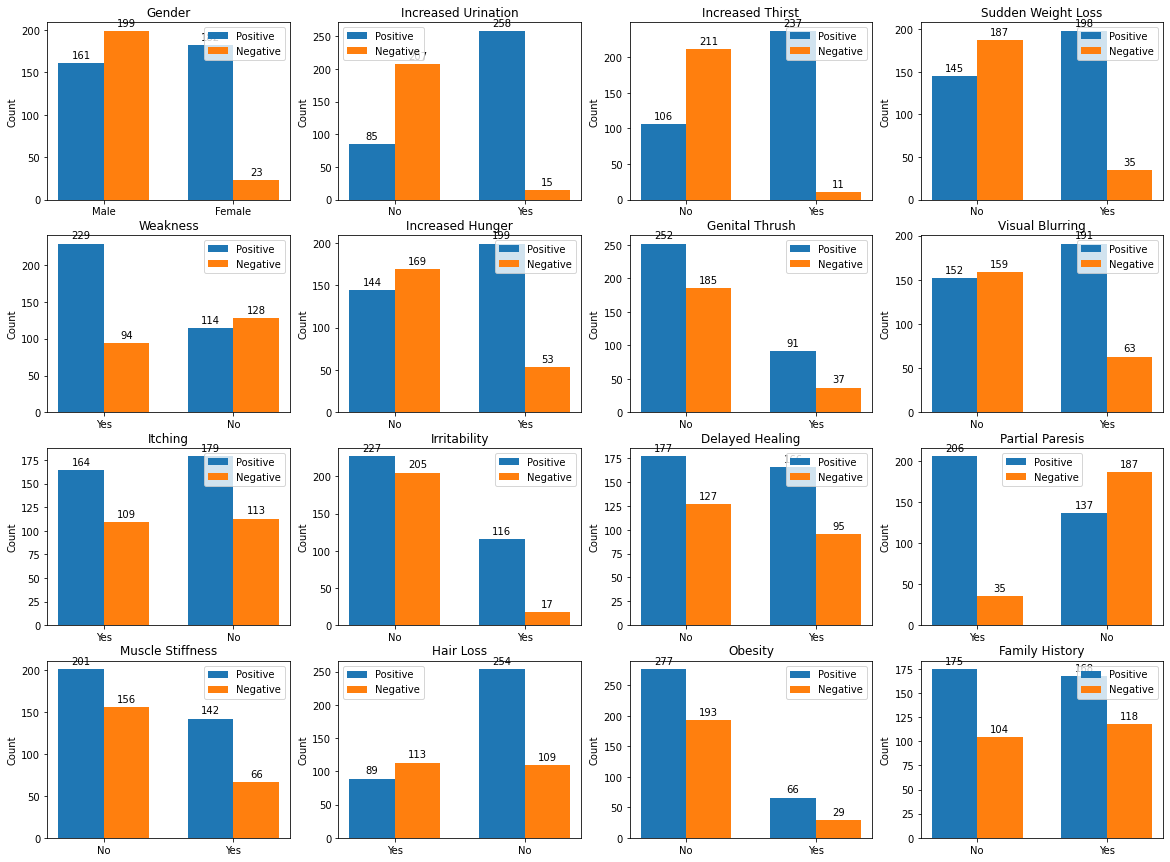

<Figure size 432x288 with 0 Axes>

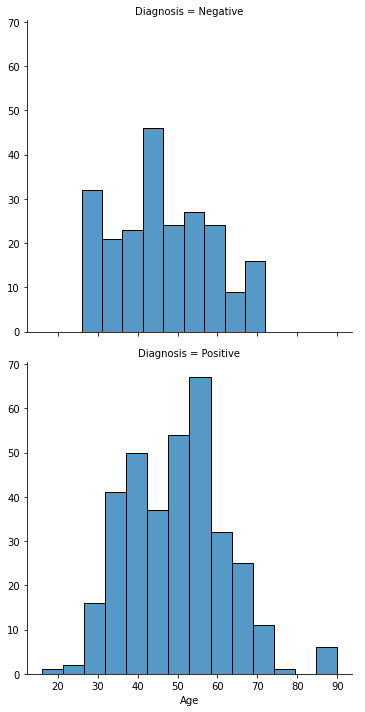

In [8]:
#3-b: the relationship between feature and label

for features in df_num:
   if features == 'Gender':
       df_num[features] = df_num[features].replace([1], value=['Male'])
       df_num[features] = df_num[features].replace([0], value=['Female'])
   elif features == 'Diagnosis':
       df_num[features] = df_num[features].replace([1], value=['Positive'])
       df_num[features] = df_num[features].replace([0], value=['Negative'])
   else:
       df_num[features] = df_num[features].replace([0], value=['No'])
       df_num[features] = df_num[features].replace([1], value=['Yes'])

df = df_num
feature_vs_label(df.drop(['Age'], axis = 1), Diagnosis = 'Diagnosis')
# Age histplot

g = sns.FacetGrid(data = df, row = 'Diagnosis', height=5).map(sns.histplot,'Age').add_legend()
plt.show()

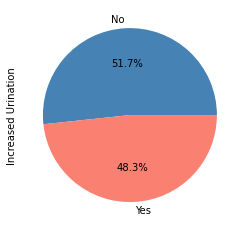

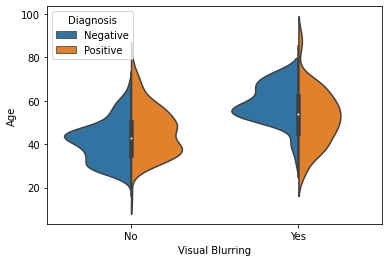

In [9]:
#3-c: additional plots relationships between feature and label

#Pie plot of Increased Urination- we suspect on this feature to have masive influnce on the models so we want to see if the data is even between the Yes No patients

selected_feature = 'Increased Urination'
df_X[selected_feature].value_counts().plot(kind="pie", labels=['No','Yes'], colors = ['steelblue', 'salmon'], autopct='%1.1f%%')
plt.show()

# violin Visual Blurring vs Age
sns.violinplot(x="Visual Blurring", y="Age", hue="Diagnosis", data=df,split=True)
plt.show()


## 3-d

I.	When we plot the Visual Blurring histogram graph, we expected to see patients that has answered 'Yes' will be label more as 'Positive' in diagnosis feature. But we seen that if we compare between the patients that have said 'Yes' there is almost an equal amount in the 'Negative' and in the 'Positive' column. Moreover, we can see that more women in the data are positive for TD1 so it can mislead the model training that will classify women to be 'Positive' more easily than men.


II.	Examining the plots of the features vs label of 'Positive' or 'Negative' diagnosis we feel there are some particular features more important for our models. Our assumptions are based on clinical evidence as well. The features are: Increased Urination, Increased thirst, and sudden weight loss. High percentage (more than 80%) of the patients who had all these symptoms, were diagnosed with DB Type 2. We know from literature review that all of these symptoms are well known to happen to people with DB. These patients can eat and drink normally but can't utilize glucose in their blood as energy for the cells. Other features such as Increased hunger and Visual blurring also gave significant percentage of positive diagnosis in patients with symptoms but less than the three mentioned before. These symptoms also correlate with what we know from literature that diabetic patients can suffer from hunger (due to inability to entry glucose to cells) and retinopathies due to cardiovascular complications for untreated diabetes. 

Surprisingly, higher percentage of female patients sampled were diagnosed with diabetes, whereas the trend was opposite in males- more males were negative to DB than positive. it is surprising because as far as we acknowledge, DB is common both in males and females equally.   

# section 4:
We were wondering how to treat the 'Age' column, as it's values aren't binary as the rest of the column.
We worried that adding the 'Age' column values as-is, will affect dramatically the training of the models and will give us strong bias we didnt wish for. 
we had 3 options:
1. ignoring the 'Age' column and encoding the data set to onehoevector without it. 
2. converting the whole data set to onehotvector, including the column 'Age'. The option gave us one big onehotvector, column for each age in the data.
3. scale the age cloumn to values  in range of [0,1]

We decided to go with the third option, beacuse our data is binary so in our opinion this option will give the best training and testing data and we are still take into consideration the Age factor in our models.


In [10]:
#### section 4- One-hot Vectors

# define one hot encoding
df_X = df.drop(['Age','Diagnosis'], axis = 1)
df_num[['Age']] = std(df_num[['Age']])
encoder = preprocessing.OneHotEncoder()
features_enc = df_X.columns
# transform data
onehot = encoder.fit_transform(df_X).toarray()
onehot = np.hstack(((df_num[['Age']].to_numpy()), onehot))
features_name = encoder.get_feature_names(['Gender','Increased Urination','Increased Thirst','Sudden Weight Loss','Weakness','Increased Hunger','Genital Thrush','Visual Blurring','Itching','Irritability','Delayed Healing','Partial Paresis','Muscle Stiffness','Hair Loss','Obesity','Family History'])
features_name = np.hstack(('Age',features_name))
# encode Y = Diagnosis
le = preprocessing.LabelEncoder()
Y_encoder = df["Diagnosis"]
Y_encoder = le.fit_transform(Y_encoder)


## section 5- Build and optimize Machine Learning Models:
We splited the data to k-fold cross validation, knowing it wont change the data itself, only the way we devide it to testing and training sets. 

In [11]:
# k-fold: (for section 5)
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=336546, shuffle=True)
C = np.array([0.001, 0.01, 1, 10, 100, 1000])


In [12]:
X_train, X_test, y_train, y_test = train_test_split(onehot, Y_encoder, test_size=0.2, random_state=336546, stratify=y)


In [13]:
##Logistic-regression:
logreg_est = LogisticRegression(solver='saga', multi_class='ovr', penalty='none', max_iter=10000)
logreg = GridSearchCV(estimator=logreg_est,
             param_grid={'penalty':['l1','l2'], 'C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)

logreg.fit(X_train, y_train.ravel())
y_pred_test = logreg.predict(X_test)
y_train_test = logreg.predict(X_train)
y_pred_proba_test = logreg.predict_proba(X_test)
y_pred_proba_test = y_pred_proba_test[:,1]

Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)

print("LogisticRegression-5")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_proba_test))) + "%")
print("The loss is {:.2f}".format(log_loss(y_test,y_pred_proba_test)))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression-5
Accuracy is 92.92 
F1 is 94.12 
AUC is: 96.48%
The loss is 0.23


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    4.0s finished


In [14]:
#SVM- linear:

svm_lin = GridSearchCV(estimator=SVC(probability=True),
             param_grid={'kernel':['linear'], 'C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)
svm_lin.fit(X_train, y_train.ravel())
best_svm_lin = svm_lin.best_estimator_
y_pred_test = best_svm_lin.predict(X_test)
y_pred_proba_test = best_svm_lin.predict_proba(X_test)

Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)


y_test[y_test == 0] = -1
y_pred_test[y_pred_test == 0] = -1

print("SVM-linear-5")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_test))) + "%")
print("The loss is {:.2f}".format(hinge_loss(y_test, y_pred_test)))

y_test[y_test == -1] = 0
y_pred_test[y_pred_test == -1] = 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
SVM-linear-5
Accuracy is 92.92 
F1 is 94.12 
AUC is: 92.97%
The loss is 0.14


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   26.2s finished


In [15]:
#SVM-nonlinear:

svm_nonlin = GridSearchCV(estimator=SVC(probability=True),
             param_grid={'kernel':['rbf','poly'], 'C':C, 'degree':[2]},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)
svm_nonlin.fit(X_train, y_train.ravel())
best_svm_nonlin = svm_nonlin.best_estimator_
# print(svm_nonlin.best_params_)
y_pred_test = best_svm_nonlin.predict(X_test)
y_pred_proba_test = best_svm_nonlin.predict_proba(X_test)

Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)

y_test[y_test == 0] = -1
y_pred_test[y_pred_test == 0] = -1

print("SVM-nonlinear-5")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_test))) + "%")
print("The loss is {:.2f}".format(hinge_loss(y_test, y_pred_test)))

y_test[y_test == -1] = 0
y_pred_test[y_pred_test == -1] = 0
                                                                    
                                                            

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits
SVM-nonlinear-5
Accuracy is 95.58 
F1 is 96.40 
AUC is: 95.14%
The loss is 0.09


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    2.5s finished


## 5. c

The performance results demonstrated by F1 score, Accuracy and AUC score, and loss function suggest a non-linear model gives better prediction results of diagnosis and  it also deliver the smallest FN FP.

||Logistic regression | SVM linear | SVM nonlinear |
|---|---|---|---|
|Accuracy| 92.92 | 92.92 |95.58 |
|||||
|F1 score| 94.12| 94.12 |96.40 |
|||||
|AUC score | 96.482 |92.97 |95.14 |
|||||
|Loss function |0.23|0.14|0.09|

We can see that nonlinear model gave the best results (highest accuracy, F1 and AUC and lowest loss function). Probably the relation between the patients features to their diagnosis is best described nonlinearly.

## section 6


In [17]:
##section6: Random-Forest

rfc = Pipeline(steps=[('rfc', RandomForestClassifier(max_depth=4, random_state=336546, criterion='gini'))])
rfc.fit(X_train, y_train.ravel())
y_pred_test = rfc.predict(X_test)
y_pred_proba_test = rfc.predict_proba(X_test)




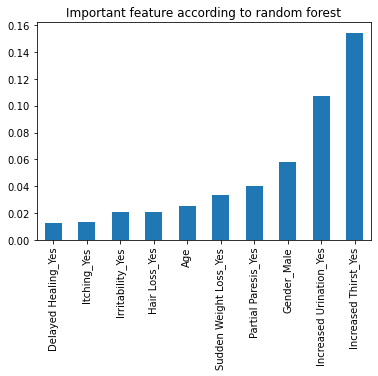

In [18]:
# Determine features importance from random forest:

important = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(features_name, rfc['rfc'].feature_importances_):
    important[feature] = importance #add the name/value pair

# We want to show only the positive features from onehotvector & the most important ones:
new_important = {}
for key in list(important.keys())[::2]:
    new_important[key]=important[key]

importances = pd.DataFrame.from_dict(new_important, orient='index').rename(columns={0: 'feature_value'})
feature_importances= importances.sort_values(by='feature_value', axis = 0)
new_feature_importances = feature_importances.tail(10)
axes = new_feature_importances.plot.bar()
plt.title('Important feature according to random forest')
axes.get_legend().remove()
plt.show()


## 6. a- 

I.	Exploring the weights given to each feature according to random forest we see that 'Increased Urination' and ' Increased Thirst' features are the two most important features for classification:

II.	The important features according to random forest matches the exploration we did in question 3-d. Matching to our pretested assumptions makes the model more reliable and accurate to use as a diagnostic tool for new patients.

 We see that the ROC graph present that the nonlinear SVM is the best option to train the model

## section 7: Data Separability Visualization
We are compering between reduced dimentionaly by PCA to 2D data and training data only on 2 best features from section 6.
Increased Urination' and ' Increased Thirst' .
This time we chose diffrent hyperparemeters values to get better results for binary data.

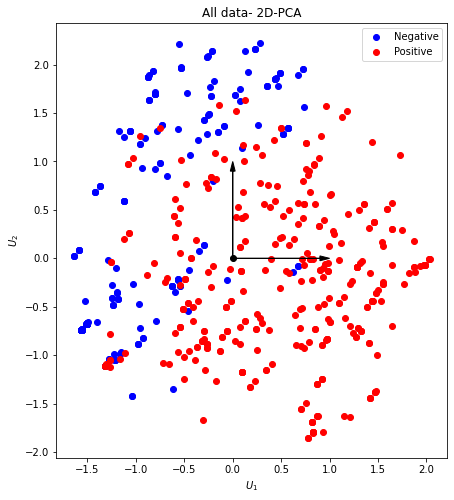

In [19]:
#### section-7 Data Separability Visualization

# Dimension reduction on all data:
n_components=2
pca = PCA(n_components=n_components, whiten=True)
X_pca = pca.fit_transform(onehot)
title= 'All data- 2D-PCA'
plt_2d_pca(X_pca,Y_encoder,title)

#Train models on dimension reduction training set:
# k-fold
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, random_state=336546, shuffle=True)
C = np.array([0.01, 0.1, 1, 10, 100])

##7. b

Plotting 2D PCA shows the reduced dimensions data can be linearly separable to two classes, the 'Negative' class located in the left-upper part of the plane, while the 'Positive' class positioned in the right-lower part of the plane. However, we see some leakage of data from each class to the other part meaning the classification specificity and sensitivity are not ideal.

In [20]:
#logistic regression-PCA:

logreg_est = LogisticRegression(solver='saga', multi_class='ovr', penalty='none', max_iter=10000)
logreg = GridSearchCV(estimator=logreg_est,
             param_grid={'penalty':['l1','l2'], 'C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)


X_train, X_test, y_train, y_test = train_test_split(X_pca, Y_encoder, test_size=0.2, random_state=336546, stratify=y)
logreg.fit(X_train, y_train.ravel())
y_pred_test = logreg.predict(X_test)
y_train_test = logreg.predict(X_train)
y_pred_proba_test = logreg.predict_proba(X_test)
y_pred_proba_test = y_pred_proba_test[:,1]

Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)
print("LogisticRegression-7PCA")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_proba_test))) + "%")
print("The loss is {:.2f}".format(log_loss(y_test,y_pred_proba_test)))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression-7PCA
Accuracy is 82.30 
F1 is 85.29 
AUC is: 92.42%
The loss is 0.34


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished


In [21]:
#SVM linear-PCA:

svm_lin = GridSearchCV(estimator=SVC(probability=True),
             param_grid={'kernel':['linear'], 'C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)

svm_lin.fit(X_train, y_train.ravel())
best_svm_lin = svm_lin.best_estimator_
y_pred_test = best_svm_lin.predict(X_test)
y_pred_proba_test = best_svm_lin.predict_proba(X_test)
y_pred_proba_test = y_pred_proba_test[:,1]
#title = 'SVM-linear- 2D PCA'
#plt_2d_pca(X_test,y_pred_test, title)
Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)

y_test[y_test == 0] = -1
y_pred_test[y_pred_test == 0] = -1
print("SVM-linear-7PCA")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_proba_test))) + "%")
print("The loss is {:.2f}".format(hinge_loss(y_test, y_pred_test)))

y_test[y_test == -1] = 0
y_pred_test[y_pred_test == -1] = 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
SVM-linear-7PCA
Accuracy is 83.19 
F1 is 85.71 
AUC is: 92.00%
The loss is 0.34


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.7s finished


In [22]:
#SVM-nonlinear-PCA
svm_nonlin = GridSearchCV(estimator=SVC(probability=True),
             param_grid={'kernel':['rbf','poly'], 'C':C, 'degree':[2]},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)

svm_nonlin.fit(X_train, y_train.ravel())
best_svm_nonlin = svm_nonlin.best_estimator_
y_pred_test = best_svm_nonlin.predict(X_test)
y_pred_proba_test =best_svm_nonlin.predict_proba(X_test)
y_pred_proba_test = y_pred_proba_test[:,1]
#title = 'SVM-nonlinear- 2D PCA'
#plt_2d_pca(X_test,y_pred_test,title)
Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)

y_test[y_test == 0] = -1
y_pred_test[y_pred_test == 0] = -1
print("SVM-nonlinear-7PCA")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_proba_test))) + "%")
print("The loss is {:.2f}".format(hinge_loss(y_test, y_pred_test)))

y_test[y_test == -1] = 0
y_pred_test[y_pred_test == -1] = 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM-nonlinear-7PCA
Accuracy is 84.07 
F1 is 86.57 
AUC is: 94.40%
The loss is 0.32


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    2.3s finished


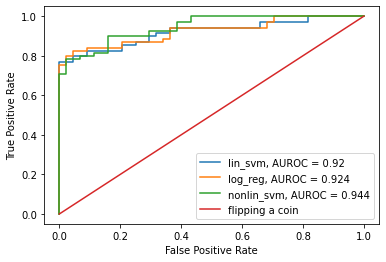

In [23]:
#Comparison between models: (PCA)

classifiers = [best_svm_lin, logreg, best_svm_nonlin]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), decimals=3))
ax.plot(np.linspace(0,1,X_test.shape[0]),np.linspace(0,1,X_test.shape[0]))
plt.legend(('lin_svm, AUROC = '+str(roc_score[0]),'log_reg, AUROC = '+str(roc_score[1]),'nonlin_svm, AUROC = '+str(roc_score[2]),'flipping a coin'))
plt.show()


In [24]:
#Dimension reduction on 2 features:
#  We chose the two important features from section 6, located in columns 4 and 6 in the onehotvector:
feature2= onehot[:,[4,6]]

#logistic regression-two features:

X_train, X_test, y_train, y_test = train_test_split(feature2, Y_encoder, test_size=0.2, random_state=336546, stratify=y)
logreg_est = LogisticRegression(solver='saga', multi_class='ovr', penalty='none', max_iter=10000)
logreg = GridSearchCV(estimator=logreg_est,
             param_grid={'penalty':['l1','l2'], 'C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)

logreg.fit(X_train, y_train.ravel())
y_pred_test = logreg.predict(X_test)
y_train_test = logreg.predict(X_train)
y_pred_proba_test = logreg.predict_proba(X_test)
y_pred_proba_test = y_pred_proba_test[:,1]

Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test,average='weighted', labels=np.unique(y_pred_test))
print("LogisticRegression-7two_feature")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_proba_test))) + "%")
print("The loss is {:.2f}".format(log_loss(y_test,y_pred_proba_test)))


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression-7two_feature
Accuracy is 90.27 
F1 is 90.34 
AUC is: 93.02%
The loss is 0.53


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [25]:
#SVM linear-two features:

svm_lin = GridSearchCV(estimator=SVC(probability=True),
             param_grid={'kernel':['linear'], 'C':C},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)
svm_lin.fit(X_train, y_train.ravel())
best_svm_lin = svm_lin.best_estimator_
y_pred_test = best_svm_lin.predict(X_test)
y_pred_proba_test =best_svm_lin.predict_proba(X_test)
y_pred_proba_test = y_pred_proba_test[:,1]
Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)

y_test[y_test == 0] = -1
y_pred_test[y_pred_test == 0] = -1

print("SVM-linear-7two_feature")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_proba_test))) + "%")
print("The loss is {:.2f}".format(hinge_loss(y_test, y_pred_test)))

y_test[y_test == -1] = 0
y_pred_test[y_pred_test == -1] = 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits
SVM-linear-7two_feature
Accuracy is 90.27 
F1 is 91.73 
AUC is: 92.62%
The loss is 0.19


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.5s finished


In [26]:
# SVM-nonlinear-two features:
svm_nonlin = GridSearchCV(estimator=SVC(probability=True),
             param_grid={'kernel':['rbf','poly'], 'C':C, 'degree':[2]},
             scoring=['accuracy','f1','precision','recall','roc_auc'],
             cv=skf, refit='roc_auc', verbose=1, return_train_score=True)

svm_nonlin.fit(X_train, y_train.ravel())
best_svm_nonlin = svm_nonlin.best_estimator_
y_pred_test = best_svm_nonlin.predict(X_test)
y_pred_proba_test =best_svm_nonlin.predict_proba(X_test)
y_pred_proba_test = y_pred_proba_test[:,1]
Acc = accuracy_score(y_test, y_pred_test)
F1 = f1_score(y_test, y_pred_test)

y_test[y_test == 0] = -1
y_pred_test[y_pred_test == 0] = -1

print("SVM-nonlinear-7two_feature")
print('Accuracy is {:.2f} \nF1 is {:.2f} '.format(100*Acc,100*F1))
print("AUC is: " + str("{0:.2f}".format(100 * metrics.roc_auc_score(y_test,y_pred_proba_test))) + "%")
print("The loss is {:.2f}".format(hinge_loss(y_test, y_pred_test)))

y_test[y_test == -1] = 0
y_pred_test[y_pred_test == -1] = 0


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 10 candidates, totalling 50 fits
SVM-nonlinear-7two_feature
Accuracy is 90.27 
F1 is 91.73 
AUC is: 92.62%
The loss is 0.19


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.3s finished


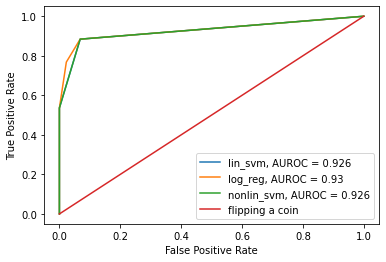

In [27]:
#Comparison between models:

classifiers = [best_svm_lin, logreg, best_svm_nonlin]
roc_score = []
plt.figure()
ax = plt.gca()
for clf in classifiers:
    plot_roc_curve(clf, X_test, y_test, ax=ax)
    roc_score.append(np.round_(roc_auc_score(y_test, clf.predict_proba(X_test)[:,1]), decimals=3))
ax.plot(np.linspace(0,1,X_test.shape[0]),np.linspace(0,1,X_test.shape[0]))
plt.legend(('lin_svm, AUROC = '+str(roc_score[0]),'log_reg, AUROC = '+str(roc_score[1]),'nonlin_svm, AUROC = '+str(roc_score[2]),'flipping a coin'))
plt.show()

## 7. e-

First, we need to remember that training binary data using reduced dimentions by PCA is not ideal. Because it doesn't show the real corralation between features*.
The results were better (according to AUC, f1 score, etc.) for 2-features than 2d PCA dimensionally reduction. We actually thought the results will lead us to the opposite conclution becuase dimentionelly reduction to 2d based on 17 features has more data to be based on for training the models, from only 2 features data. We assume we got this result because the 2 features are much more important according to section 6 from the other features (see the plot above). Therefore, the other features didnt add that much more information for final classification by the models, than the 2 important feature been used in 7d. 
Overall, we dont forget that PCA does lose data while it does linear combination between the features for dimensionally reduction. 

||Logistic regression-PCA | SVM linear-PCA | SVM nonlinear-PCA | Logistic regression-two features | SVM linear-two features | SVM nonlinear-two features|
|---|---|---|---|---|---|---|
|Accuracy| 82.30 | 83.19 | 84.07 | 90.27 |90.27 | 90.27
|||||||||
|F1 score| 85.29 |85.71 | 86.57 | 90.34| 91.73 | 91.73
|||||||||
|AUC score |92.42 |92 |92.14 | 93.02 |92.62 | 92.62
|||||||||
|Loss function |0.34|0.34|0.32| 0.53 | 0.19 |0.19


*"A Generalization of Principal Component Analysis to the Exponential Family", Michael Collins, Sanjoy Dasgupta, Robert E. Schapire
AT&T Labs  Research
180 Park Avenue, Florham Park, NJ 07932, mcollins, dasgupta, schapire  @research.att.com